In [51]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime 
from datetime import timedelta


In [52]:
import os
#get working directory in python
os.getcwd()
#change working directory in python
os.chdir("/home/belu/Escritorio/Proyecto_TESIS/reanalysis/BS_otonio")

import funciones as fun

In [98]:
anios = np.array(["1980_03","1984_04","1990_03","1991_04","1996_05","2000_04","2001_03",
                  "2003_03","2007_03","2008_04","2010_05"])

my_data="ERA_interim_reanalisis_" + anios[0] + "_gep_wind_temp_area1.nc"
fh = Dataset(my_data, mode='r')

In [99]:
lat = fh.variables['latitude'][:]
lon = fh.variables['longitude'][:]

time = fh.variables['time'][:]
hgt = fh.variables['z'][:] # 2 meter temperature
temp=fh.variables["t"][:]
v= fh.variables["v"][:]
u= fh.variables["u"][:]

v_units = fh.variables['v'].units
hgt_units= fh.variables["z"].units
temp_units=fh.variables["t"].units

In [100]:
m = Basemap(projection='cyl', llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')

lon, lat = np.meshgrid(lon, lat)
xi, yi = m(lon, lat)

In [101]:
# PASO 1: Crear una lista de "RGB tuples" (Ver https://es.wikipedia.org/wiki/Colores_web#Tabla_de_colores)
colors = [(255,255,255),(255,255,255),(255, 255, 150),(255, 100 , 50),(255, 10, 10)
          ,( 150, 0, 0),(50, 0 ,0)]

# PASO 2: Crear un "array o "list" de posiciones de 0 a 1 (abarcando el rango de la variable a graficar)
position = [0, 0.166,0.333, 0.4999, 0.6666,0.83333,1]

# PASO 3: Llamar a la funcion "make_cmap" que devuelve el nuevo colormap para luego utilizar en la grafica
cmap_new_r = fun.make_cmap(colors,70, position=position, bit=True)

/home/belu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


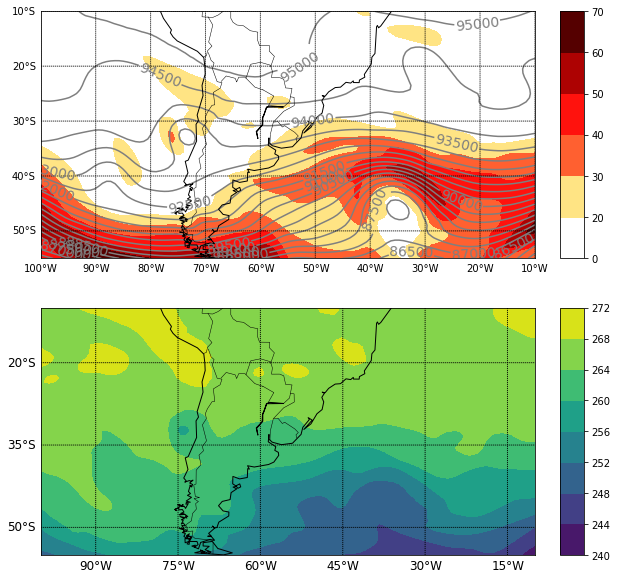

In [111]:
fig = plt.figure(figsize=(10,10))

#############################################################################################################
ax1 = fig.add_subplot(2,1,1)
# hgt(tiempo, nivel)
# m.contour(x,y,z,{cada/20 mgp})
#plt.clabel(cs,,,fmt="%1.0f") fmt se usa para darle formato a las etiquetas,  "%1.0f" =sin decimales
#"%1.3" para 3 decimales y ese es x default

cs = m.contour(xi,yi,np.squeeze(hgt[118,0]),20,colors="#7f7f7f")
#cs = m.contour(xi,yi,np.squeeze(hgt[119,0]),20,colors="k")

plt.clabel(cs, inline=1, fontsize=14,fmt ="%1.0f")


speed=np.sqrt(u*u+v*v)

#cs1=m.contour(xi,yi,speed[117,0],latlon=True)
#plt.clabel(cs1, inline=1, fontsize=14)

cs2=m.contourf(xi,yi,speed[118,0],levels=[0,20,30,40,50,60,70],cmap=cmap_new_r,latlon=True)


# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs2 ,location='right', pad="5%")
#plt.figtext(.5,.8,'Geopotencial (gpm) e Isotacas (m/s) a 300 hpa', fontsize=25, ha='center')
#plt.show()
#cbar.set_label(v_units)

#############################################################################################################
ax1 = fig.add_subplot(2,1,2)

cs = m.contourf(xi,yi,np.squeeze(temp[118,1]))
#plt.clabel(cs, inline=1, fontsize=14,fmt ="%1.0f")

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=12)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=12)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs ,location='right', pad="5%")
#plt.figtext(.5,.8,'Geopotencial (gpm) e Isotacas (m/s) a 300 hpa', fontsize=25, ha='center')
#plt.show()
#cbar.set_label(v_units)


/home/belu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


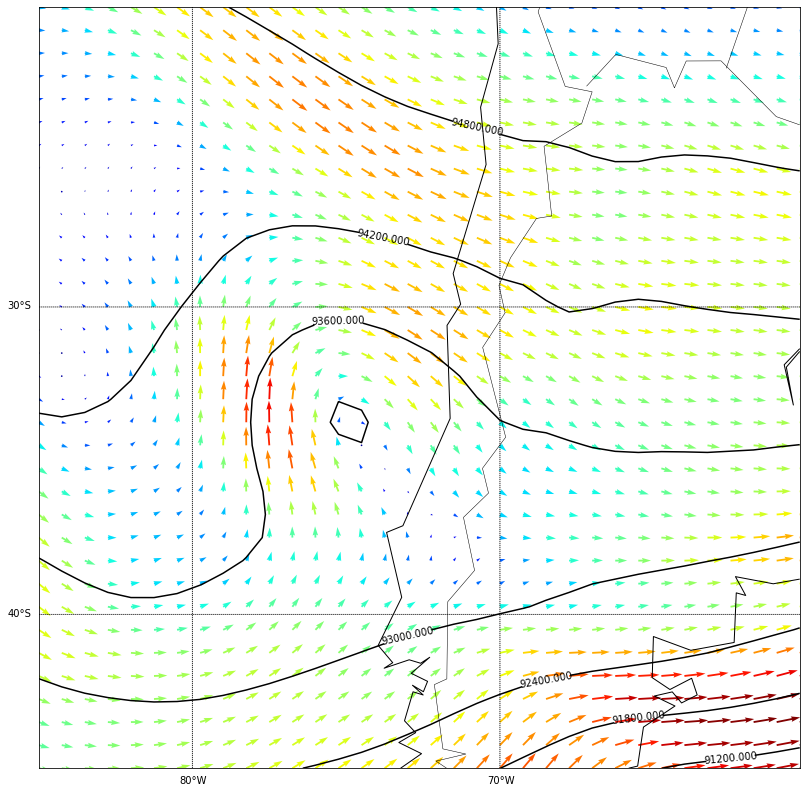

In [69]:

fig = plt.figure(figsize=(18,14))

#############################################################################################################
# hgt(tiempo, nivel)
cs = m.contour(xi,yi,np.squeeze(hgt[117,0]),colors="black")
plt.clabel(cs, inline=1, fontsize=10)

speed=np.sqrt(u*u+v*v)

#yy=np.arange(0,len(lat),3)
#xx=np.arange(0,len(lon),3)
#points=np.meshgrid(yy,xx)

cs1=m.quiver(xi,yi,u[117,0],v[117,0],speed[117,0],cmap="jet",latlon=True)
# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
#cbar = m.colorbar(cs1, location='bottom', pad="10%")
#cbar.set_label(hgt_units)

In [ ]:
# PASO 1: Crear una lista de "RGB tuples" (Ver https://es.wikipedia.org/wiki/Colores_web#Tabla_de_colores)
colors = [(255,255,255),(255,255,255),(255, 255, 255), (255, 105, 180),(255, 20, 147),
          (199, 21, 133), (100,100,100), (139, 0 ,139)]

# PASO 2: Crear un "array o "list" de posiciones de 0 a 1 (abarcando el rango de la variable a graficar)
position = [0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9,1]

# PASO 3: Llamar a la funcion "make_cmap" que devuelve el nuevo colormap para luego utilizar en la grafica
cmap_new_r = fun.make_cmap(colors,70, position=position, bit=True)